In [22]:
#Task 1
import pandas as pd

# Load the dataset
df = pd.read_csv('master.csv')

# Calculate the average number of suicides
average_suicides = df['suicides_no'].mean()
print(f"Average number of suicides: {average_suicides}")

Average number of suicides: 242.57440690150972


In [23]:
# Filter data for the year 2010
df_2010 = df[df['year'] == 2010]

# Calculate the average number of suicides in 2010
average_suicides_2010 = df_2010['suicides_no'].mean()
print(f"Average number of suicides in 2010: {average_suicides_2010}")

Average number of suicides in 2010: 226.0435606060606


In [24]:
# Group by gender and calculate the average number of suicides
average_suicides_by_gender = df.groupby('sex')['suicides_no'].mean()
print(average_suicides_by_gender)

sex
female    112.114306
male      373.034508
Name: suicides_no, dtype: float64


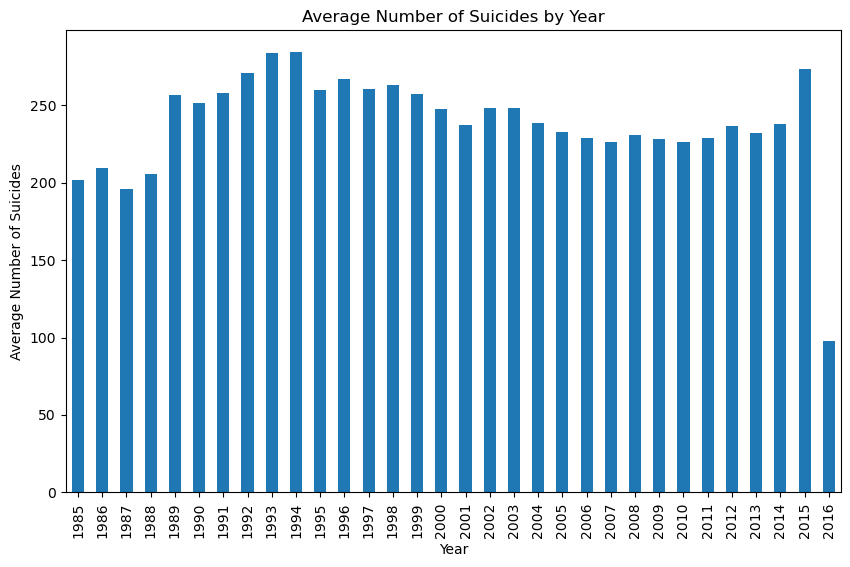

In [25]:
#Task 2
import matplotlib.pyplot as plt

# Group by year and calculate the average number of suicides
average_suicides_by_year = df.groupby('year')['suicides_no'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_suicides_by_year.plot(kind='bar')
plt.title('Average Number of Suicides by Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Suicides')
plt.show()

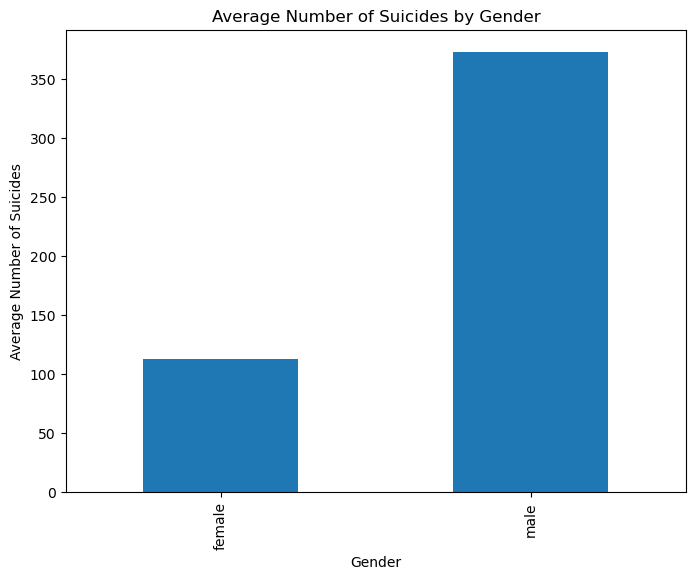

In [26]:
#Task 3
# Group by gender and calculate the average number of suicides
average_suicides_by_gender = df.groupby('sex')['suicides_no'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
average_suicides_by_gender.plot(kind='bar')
plt.title('Average Number of Suicides by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Suicides')
plt.show()

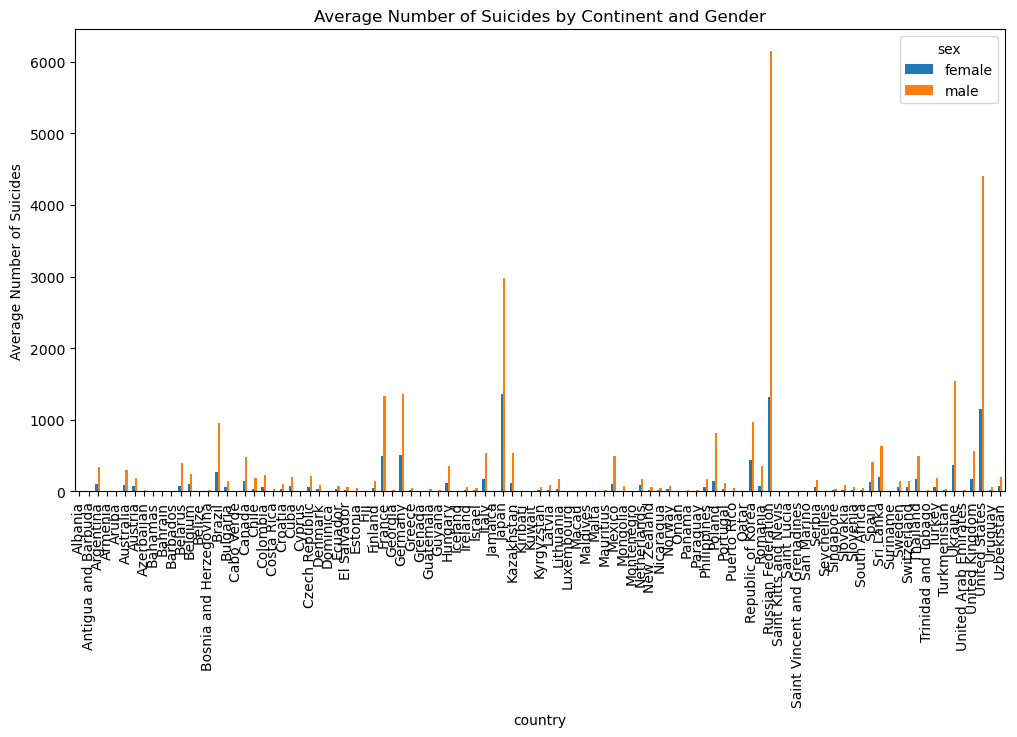

In [10]:
#Task 4
# Group by continent and gender, then calculate the average number of suicides
average_suicides_by_continent_gender = df.groupby(['country', 'sex'])['suicides_no'].mean().unstack()

# Create a bar plot
average_suicides_by_continent_gender.plot(kind='bar', figsize=(12, 6))
plt.title('Average Number of Suicides by Continent and Gender')
plt.xlabel('country')
plt.ylabel('Average Number of Suicides')
plt.show()

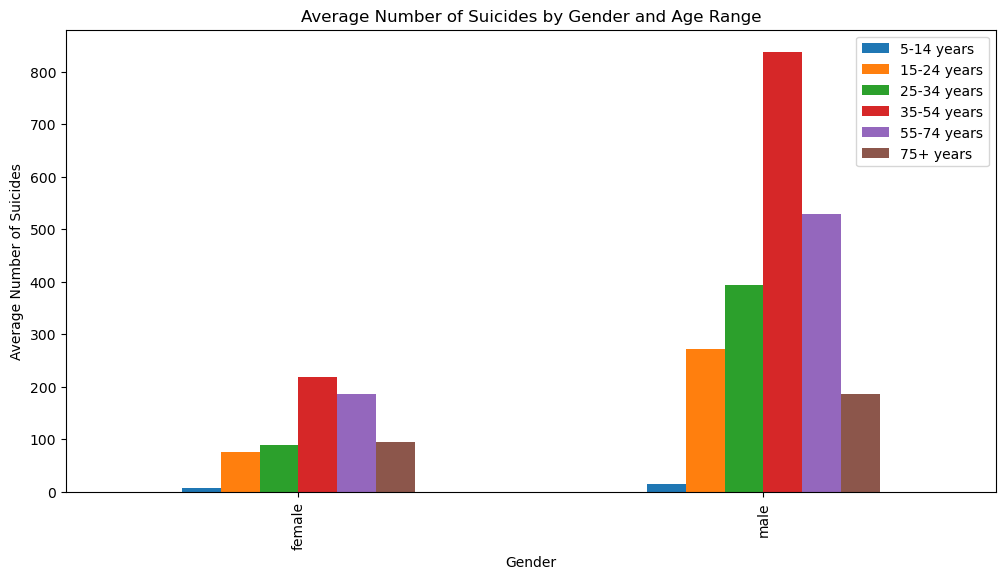

In [27]:
#Task 5
# Define age ranges
age_ranges = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

# Create a dictionary to store results
results = {}

# Loop through each age range and calculate the average number of suicides by gender
for age_range in age_ranges:
    df_age = df[df['age'] == age_range]
    results[age_range] = df_age.groupby('sex')['suicides_no'].mean()

# Convert results to a DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Create a bar plot
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Average Number of Suicides by Gender and Age Range')
plt.xlabel('Gender')
plt.ylabel('Average Number of Suicides')
plt.show()

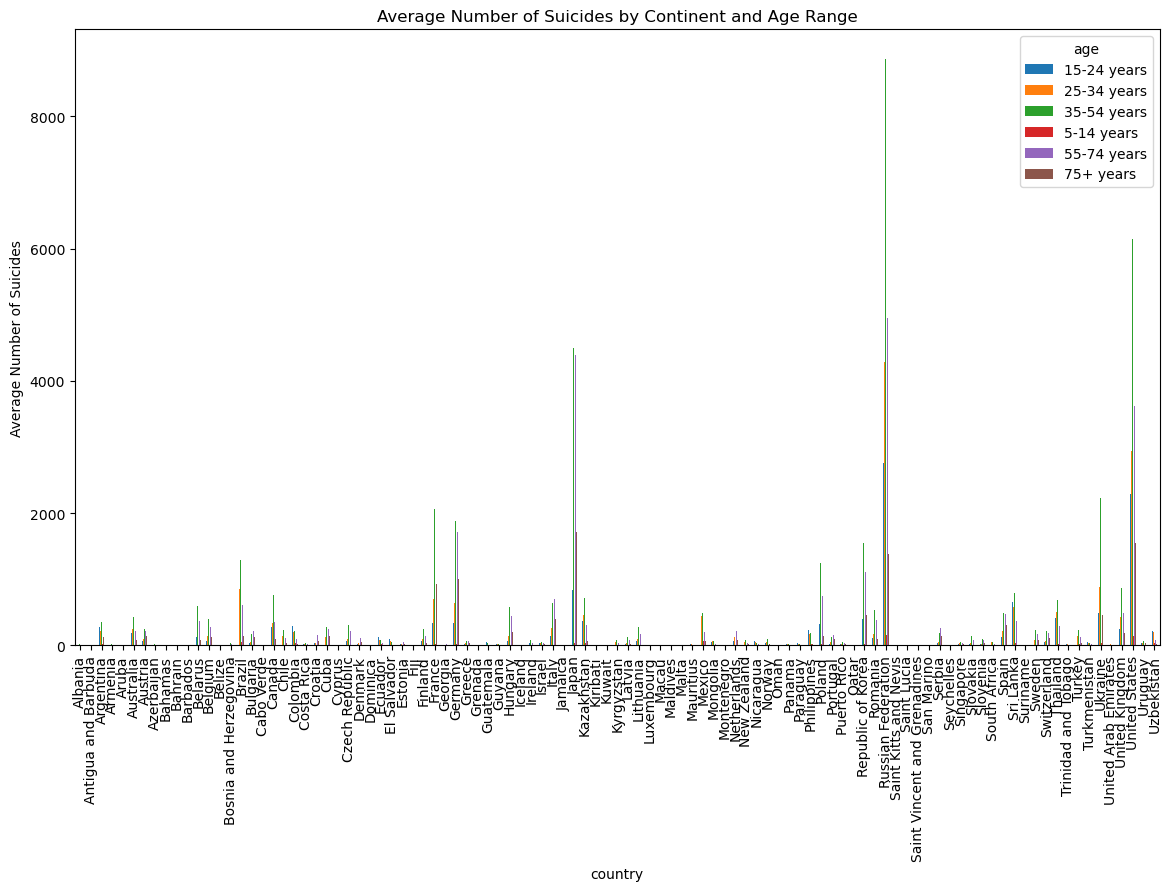

In [13]:
#Task 6
# Group by continent and age, then calculate the average number of suicides
average_suicides_by_continent_age = df.groupby(['country', 'age'])['suicides_no'].mean().unstack()

# Create a bar plot
average_suicides_by_continent_age.plot(kind='bar', figsize=(14, 8))
plt.title('Average Number of Suicides by Continent and Age Range')
plt.xlabel('country')
plt.ylabel('Average Number of Suicides')
plt.show()

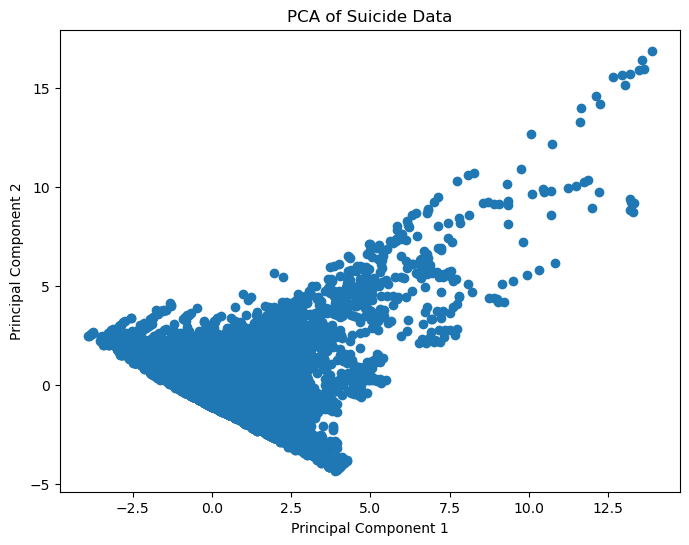

In [28]:
#Task 7
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]

# Step 2: Handle missing values
# Impute missing values (using mean in this case)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numerical), columns=df_numerical.columns)

# Step 3: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Step 4: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(df_scaled)

# Step 5: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Step 6: Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA of Suicide Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()